# Iniciación en Python con Aplicaciones en Aceración (module 03)

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [11]:
import numpy as np
import pandas as pd
import os
import ev
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

In [12]:
random_state = 42

# 1. Contexto Metalúrgico

La estadística de valores extremos es una rama de la estadística que se interesa en estimar la probabilidad de que ocurra un evento más extremo que cualquier evento observado previamente.

Dentro del contexto de calidad metalúrgica y de caracterización de materiales, un evento extremo podría ser la probabilidad de que una característica microstructural en un material (e.g., inclusiones, hojuelas de grafito, precipitados, porosidades, cavidades, etc.) sea más grande que a un tamaño crítico. En este contexto, la Distribución (Gumbel) de Valores Extremos se utiliza para estimar las probabilidades.

El objetivo es proveer una guía práctica para realizar análisis de características microestructurales de materiales, utilizando librerías de Python. Este notebook se enfoca en la
**Estimación de parámetros de la Distribución (Gumbel) de Valores Extremos**.



Al final de este Notebook, se provee una sección con  **Referencias**.

# 2. Fundamentos de Análisis de Valores Extremos

En esta sección se presenta primeramente la Distribución Empírica (de Probabilidad Acumulada). Después se presenta la Distribución (Gumbel) de Valores Extremos, junto con dos metodologías para la estimación de los parámetros de la distribución (método de momentos, y método de la máxima verosimilitud).

## 2.1 Distribución Empírica

Cada una de las $N$ mediciones de tamaño de una característica microestructural se puede representar como $x_i$, en donde $1 \le i \le N$.

Para estimar la __Distribución Empírica__, los datos de tamaño de una característica microestructural, $x_i$, se ordenan en orden ascendente de tal forma que:

$$x_1 \le x_2 \le x_3 \ldots \le x_N$$

La distribución empírica se calcula como:

$$P_i = \frac{i}{N+1}$$

La función `eCDF()`, presenta una implementación de la Distribución empírica:

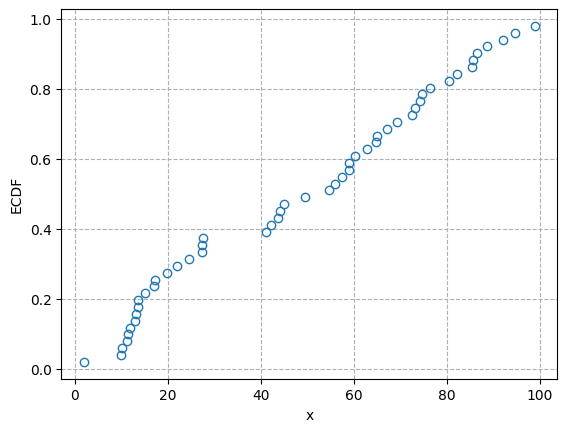

In [13]:
x = np.random.uniform(0, 100, 50)
xsorted, ecdf = ev.eCDF(x)

fig, ax = plt.subplots()

ax.plot(xsorted, ecdf, ls='', marker='o', markerfacecolor='None')
ax.set(
    xlabel="x",
    ylabel="ECDF",
)
ax.grid(ls='--')
plt.show()

## 2.2 Distribución (Gumbel) de Valores Extremos

### 2.2.1 Función de Densidad de Probabilidad (PDF)

La función de densidad de probabilidad (PDF) para la Distribución (Gumbel) de Valores Extremos está dada por:

$$f(x) = \frac{1}{\delta} \left[\exp\left(-\frac{x-\lambda}{\delta}\right)\right] \times \exp\left[-\exp\left(-\frac{x-\lambda}{\delta}\right)\right]$$

donde:

- $x$: tamaño de la característica microestructural más grande en un área de control, $A_0$.

- $\lambda$: parámetro de locación de la Distribución (Gumbel) de Valores Extremos.

- $\delta$: parámetro de escala de la Distribución (Gumbel) de Valores Extremos.

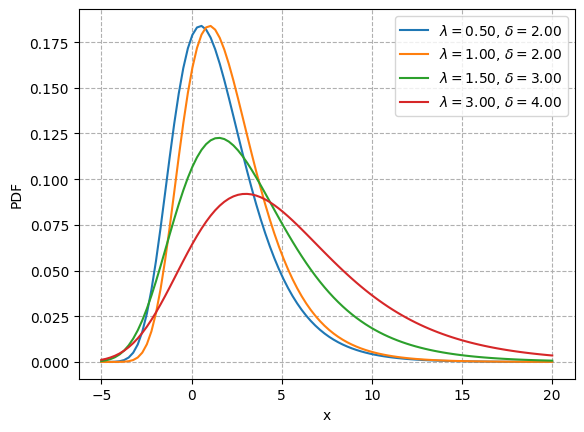

In [14]:
x = np.linspace(-5, 20, 100)
lambdas = [0.5, 1.0, 1.5, 3.0]
deltas = [2.0, 2.0, 3.0, 4.0]

fig, ax = plt.subplots()
for la, de in zip(lambdas, deltas):
    label = "".join([r"$\lambda=$", f"{la:.2f}, ", r"$\delta=$", f"{de:.2f}"])
    ax.plot(x, gumbel_r.pdf(x, la, de), label=label)
ax.set(xlabel="x", ylabel="PDF",)
ax.legend()
ax.grid(ls='--')
plt.show()

### 2.2.2 Función de probabilidad acumulada (CDF)

La función de densidad acumulada (CDF) está dada por:

$$F(x) = \exp\left(-\exp\left(-\frac{x - \lambda}{\delta}\right)\right)$$


donde:

- $x$: tamaño de la característica microestructural más grande en un área de control, $A_0$.

- $\lambda$: parámetro de locación de la Distribución (Gumbel) de Valores Extremos.

- $\delta$: parámetro de escala de la Distribución (Gumbel) de Valores Extremos.

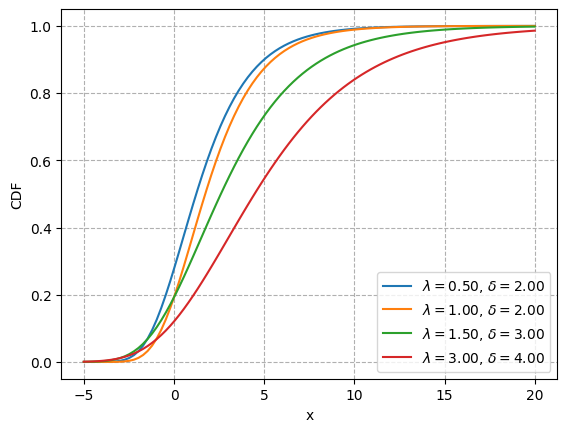

In [15]:
x = np.linspace(-5, 20, 100)
lambdas = [0.5, 1.0, 1.5, 3.0]
deltas = [2.0, 2.0, 3.0, 4.0]

fig, ax = plt.subplots()
for la, de in zip(lambdas, deltas):
    label = "".join([r"$\lambda=$", f"{la:.2f}, ", r"$\delta=$", f"{de:.2f}"])
    ax.plot(x, gumbel_r.cdf(x, la, de), label=label)
ax.set(xlabel="x", ylabel="CDF",)
ax.legend()
ax.grid(ls='--')
plt.show()

## 2.3. Estimación de parámetros de la distribución

### 2.3.1 Método de momentos

Los parámetros de la Distribución (Gumbel) de Valores Extremos se estiman mediante las siguientes ecuaciones:

$$\delta_{mom} = \frac{s \, \sqrt{6}}{\pi}$$

$$\lambda_{mom} = \bar{X} - 0.5772 \, \delta_{mom}$$

El subindice, $_{mom}$ , indica que los estimados se obtienen por el método de momentos, en el cuál:

- El primer momento es el promedio del tamaño más grande de la característica microestructural, $\bar{X}$, calculado a partir de la serie de datos:

$$\bar{X} = \frac{1}{N} \sum_{i=1}^{n} x_i$$

- La raíz cuadrada del segundo momento es la desviación estandar de la serie de datos:

$$s = \left[\sum_{i=1}^{N} \frac{\left(x_i - \bar{X}\right)^2}{N-1}\right]^{0.5}$$


La función `fitEVmom()` es una implementación del procedimiento para estimar los parámetros de la Distribución (Gumbel) de Valores Extremos mediante el método de momentos.

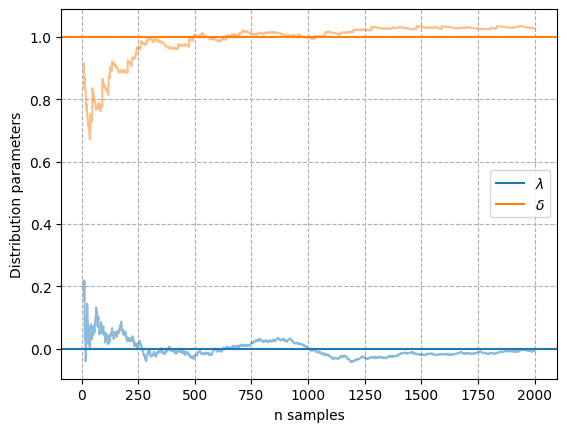

In [16]:
# Crear datos sacados de una distribución Gumbel
lam0, del0 = 0.0, 1.0
nmin, nmax = 10, 2000
ns = np.linspace(nmin, nmax, nmax-nmin, dtype=int)
lams, dels = [], []

for ii, n in enumerate(ns):
    x_random = gumbel_r.rvs(loc=lam0, scale=del0, size=n, random_state=123)
    lamb, delta = ev.fitEVmom(x_random, verbose=False)
    lams.append(lamb)
    dels.append(delta)
lams, dels = np.array(lams), np.array(dels)

fig, ax = plt.subplots()
ax.axhline(lam0, color='C0', label=r"$\lambda$")
ax.axhline(del0, color="C1", label=r"$\delta$")
ax.plot(ns, lams, color="C0", alpha=0.5)
ax.plot(ns, dels, color="C1", alpha=0.5)
ax.set(xlabel="n samples", ylabel="Distribution parameters")
ax.legend()
ax.grid(ls='--')
plt.show()

### 2.3.2 Método de máxima verosimilitud (Maximum Likelihood)

El método de máxima verosimilitud se basa en el postulado que el mejor estimado de parámetros para la distribución es aquel que maximice la verosimilitud entre la distribución y los datos de tamaño de característica microestructural. Este procedimiento se lleva a cabo mediante un método numérico en el cuál se buscan los parámetros de distribución que maximicen una función objetivo dada por la suma de los logaritmos de la función de densidad de probabilidad evaluada para todos los datos. Cuando se utiliza logaritmo natural, la función de optimización es de la forma:

$$LL=\sum_{i=1}^{N} \ln \left(f\left(x_i, \lambda, \delta \right) \right)$$

para la cual, el procedimiento de optimización consiste en encontrar los valores de $\lambda_{ML}$ y $\delta_{ML}$ que maximicen el valor de $LL$. El subídice $_{ML}$, indica que los estimados son obtenidos mediante el método de máxima verosimilitud.


La función `fitEVml()`, es un wrapper para la función `gumbel_r.fit()` de la librería `scipy.stats`, que permite estimar los parámetros de la distribución mediante el método de máxima verosimilitud.

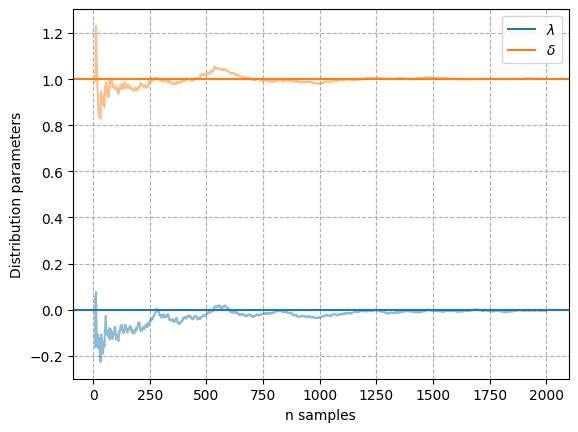

In [17]:
# Crear datos sacados de una distribución Gumbel
lam0, del0 = 0.0, 1.0
nmin, nmax = 10, 2000
ns = np.linspace(nmin, nmax, nmax-nmin, dtype=int)
lams, dels = [], []

for ii, n in enumerate(ns):
    x_random = gumbel_r.rvs(loc=lam0, scale=del0, size=n, random_state=random_state)
    # evDist = gumbel_r.fit(x_random)
    # lamb, delta = evDist[0], evDist[1]
    lamb, delta = ev.fitEVml(x_random, verbose=False)
    lams.append(lamb)
    dels.append(delta)
lams, dels = np.array(lams), np.array(dels)

fig, ax = plt.subplots()
ax.axhline(lam0, color='C0', label=r"$\lambda$")
ax.axhline(del0, color="C1", label=r"$\delta$")
ax.plot(ns, lams, color="C0", alpha=0.5)
ax.plot(ns, dels, color="C1", alpha=0.5)
ax.set(xlabel="n samples", ylabel="Distribution parameters")
ax.legend()
ax.grid(ls='--')
plt.show()

### 2.3.3 Intervalo de confianza

El error estándar para el tamaño de una característica microestructural, $x$, basado en los résultados del método de máxima verosimilitud, está dado por:


$$\mathrm{SE}(x) = \delta \sqrt{\frac{1.109+0.514\,y+0.608\,y^2}{N}}$$

$$y = \frac{x - \lambda}{\delta}$$

El intervalo de confianza de 95% está dado por:

$$95\%\,\mathrm{CI} = \pm 2\, \mathrm{SE}(x)$$

donde:

- $x$: tamaño de la característica microestructural.

- $\lambda$: parámetro de locación de la Distribución (Gumbel) de Valores Extremos.

- $\delta$: parámetro de escala de la Distribución (Gumbel) de Valores Extremos.

- $N$: numero de datos de mediciones utilizadas en el proceso de ajuste de la Distribución (Gumbel) de Valores Extremos.

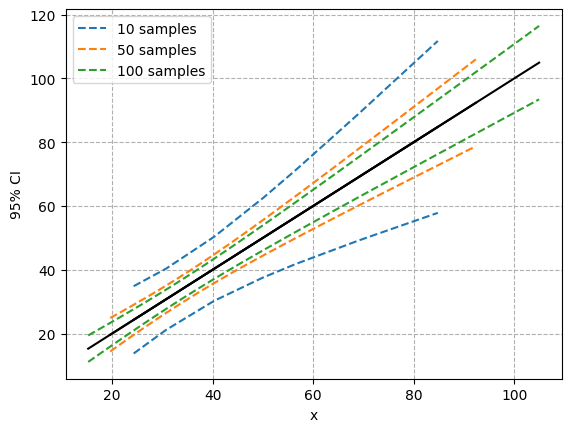

In [20]:
lam0, del0 = 40, 15
ns, cs = [10, 50, 100], ["C0", "C1", "C2"]


fig, ax = plt.subplots()

for n, c in zip(ns, cs):
    x_random = gumbel_r.rvs(loc=lam0, scale=del0, size=n, random_state=random_state)
    xsorted = np.sort(x_random)
    se = ev.calcSE(xsorted, lam0, del0)
    ax.plot(xsorted, xsorted, ls='-', c='k')
    ax.plot(xsorted, xsorted + 2*se, ls='--', c=c, label=f'{n} samples')
    ax.plot(xsorted, xsorted - 2*se, ls='--', c=c)
ax.set(xlabel="x", ylabel="95% CI")
ax.legend()
ax.grid(ls='--')
plt.show()


# Referencias

**Artículos:**

[[Castro et al. 2015](https://link.springer.com/article/10.1007%2Fs11663-016-0640-y)]

Castro-Cedeño, E. I., Herrera-Trejo, M., Castro-Román, M., Castro-Uresti, F., & López-Cornejo, M. (2016).   
Evaluation of steel cleanliness in a steel deoxidized using Al.   
Metallurgical and Materials Transactions B, 47(3), 1613-1625.

[[Huazano et al. 2022]](https://doi.org/10.3390/ma15217681)

Huazano-Estrada, P., Herrera-Trejo, M., Castro-Román, M. d. J., & Ruiz-Mondragón, J. (2022).  
Characterization of Inclusion Size Distributions in Steel Wire Rods.  
Materials, 15(21), 7681.

**Documentación Scipy:**

[scipy.stats.gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html)


**Libros:**

[Y. Murakami, Metal Fatigue (2002)](https://www.sciencedirect.com/book/9780080440644/metal-fatigue)

[Y. Murakami, Metal Fatigue 2nd. ed (2019)](https://www.sciencedirect.com/book/9780128138762/metal-fatigue)



**Normas ASTM:**

[ASTM E2283: Standard Practice for Extreme Value Analysis of Nonmetallic Inclusions in Steel and Other Microstructural Features](https://www.astm.org/e2283-08r19.html)



**Web:**

[Gumbel Distribution](https://en.wikipedia.org/wiki/Gumbel_distribution)

[Extreme Value Type I Distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366g.htm)




